In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import openpyxl as px

In [3]:
e1 = pd.read_excel(r"C:/Users/diana/OneDrive - Universidad de los Andes/Documentos/9no Semestre/TesisGEB_AlejaYCami/Repositorio/ProyectoGradoGEB/datos/EICH101.xlsx")

In [4]:
desc_e1 = e1.describe()
print(desc_e1)

       ORIG_STD_VOLUME     STD_VOLUME  ORIG_TEMPERATURE   TEMPERATURE  \
count     46849.000000   46849.000000      46849.000000  46849.000000   
mean        363.116016     363.223686         25.972458     25.972458   
std        1335.170290    1335.199042          2.650370      2.650370   
min           0.000000       0.000000         15.138673     15.138673   
25%         296.375000     296.375000         24.183510     24.183510   
50%         417.062500     417.063139         25.933928     25.933928   
75%         473.937500     473.968750         28.138079     28.138079   
max      262748.624998  262748.624998         31.580833     31.580833   

           PRESSURE  ORIG_PRESSURE  ORIG_RAW_VOLUME    RAW_VOLUME  
count  46849.000000   46849.000000     4.684900e+04  4.684900e+04  
mean      17.497431      17.497431     2.134519e+07  2.134519e+07  
std        0.565637       0.565637     4.620083e+09  4.620083e+09  
min        0.520184       0.520184     0.000000e+00  0.000000e+00  
25

## Nulos

In [5]:
nulos = e1.isnull().sum()
print(nulos)

ORIG_STD_VOLUME     0
STD_VOLUME          0
ORIG_TEMPERATURE    0
TEMPERATURE         0
PRESSURE            0
ORIG_PRESSURE       0
ORIG_RAW_VOLUME     0
RAW_VOLUME          0
EFFECTIVE_DATE      0
dtype: int64


## Duplicados

In [6]:
duplicados = e1.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


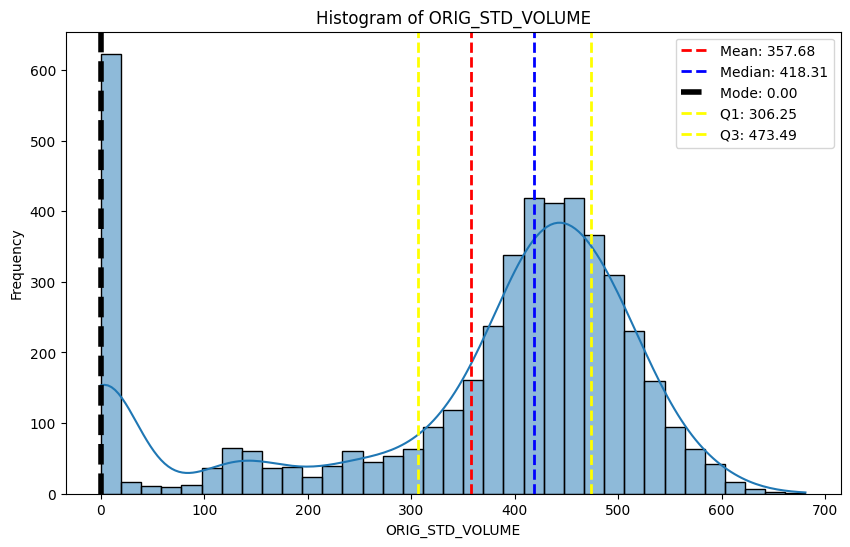

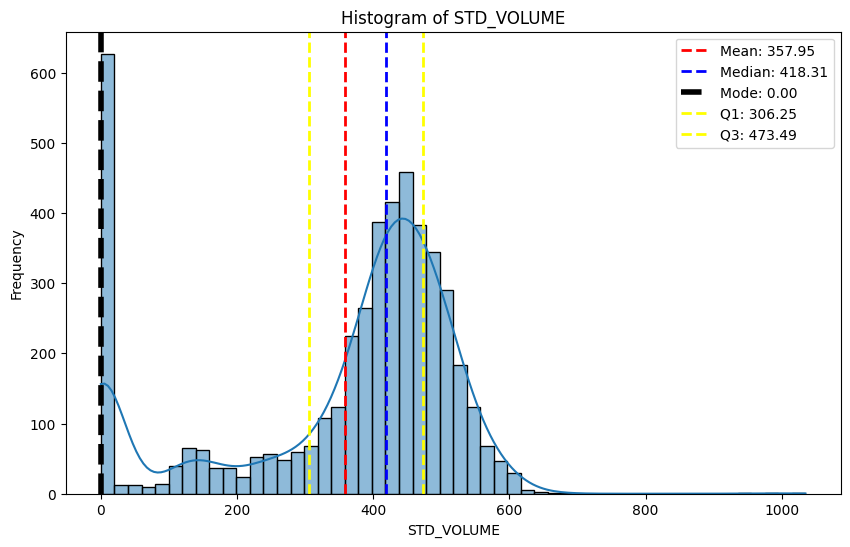

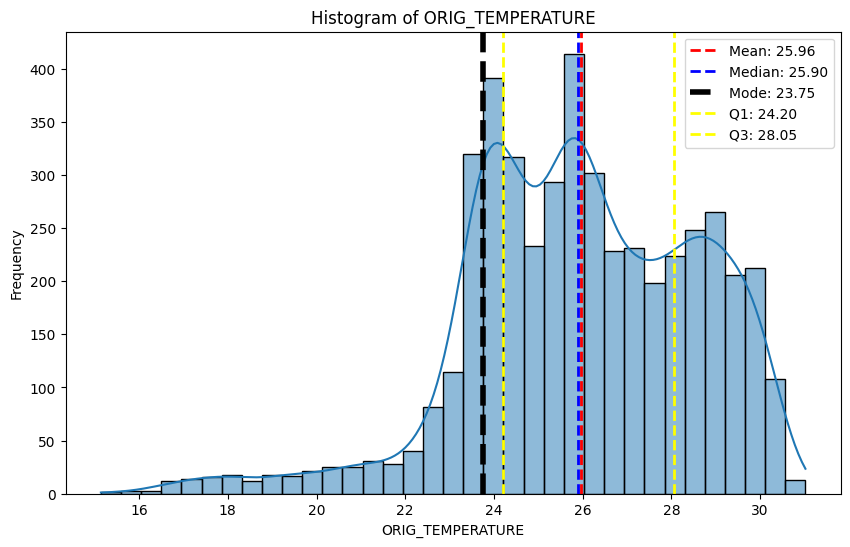

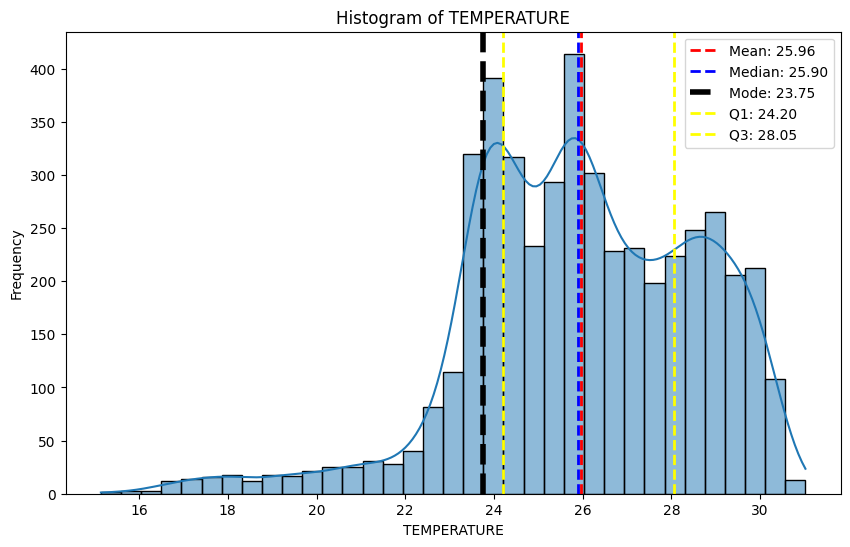

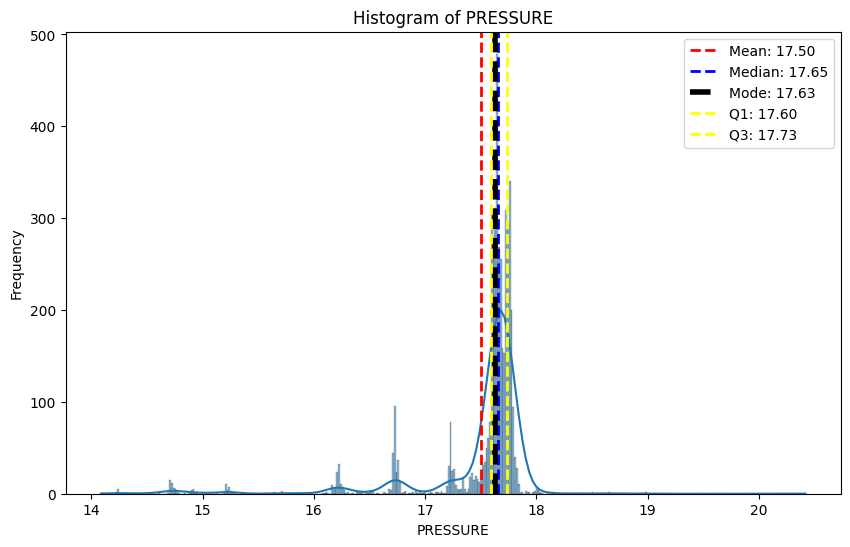

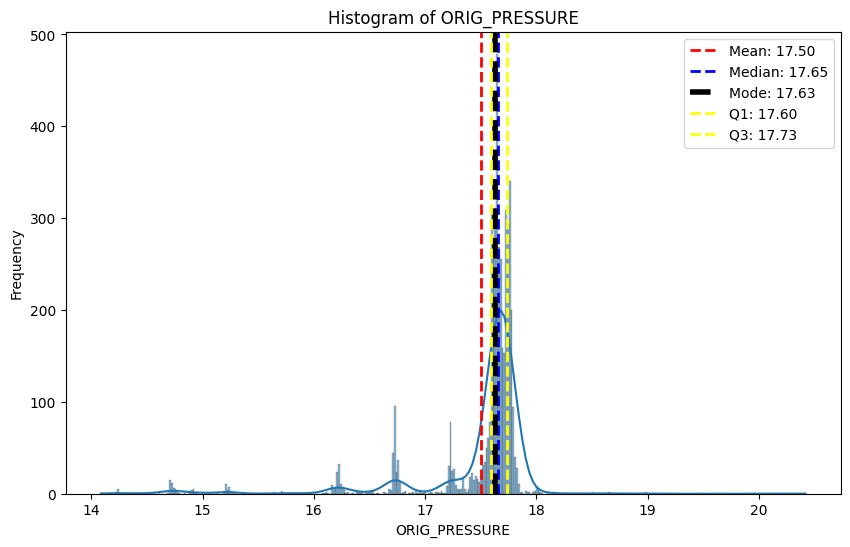

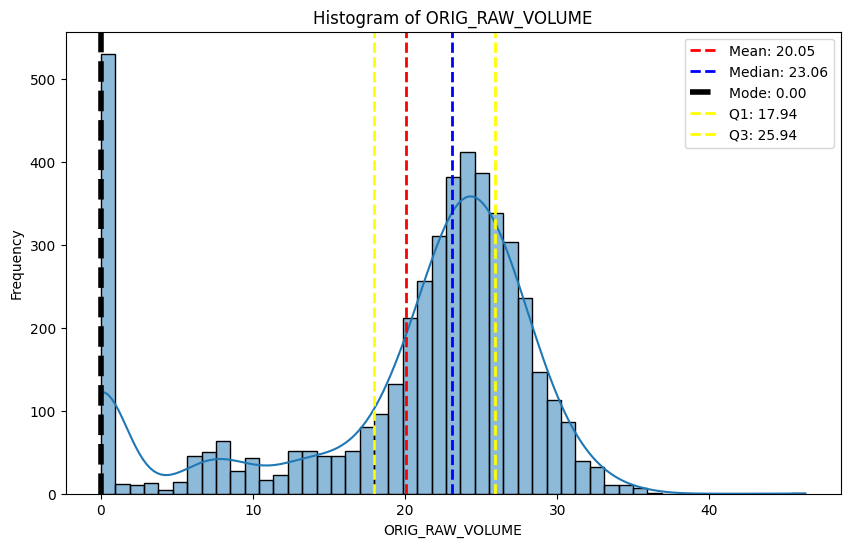

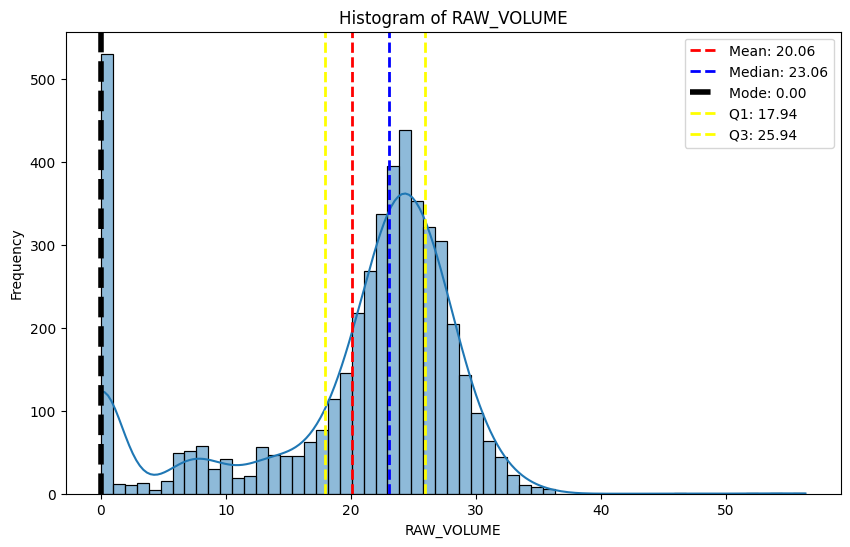

In [7]:
variables = ['ORIG_STD_VOLUME', 'STD_VOLUME', 'ORIG_TEMPERATURE', 'TEMPERATURE', 'PRESSURE', 'ORIG_PRESSURE', 'ORIG_RAW_VOLUME', 'RAW_VOLUME']

# Use a smaller sample of the data for plotting
sampled_e1 = e1.sample(frac=0.1, random_state=1)

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=sampled_e1, x=var, kde=True)
    
    mean = sampled_e1[var].mean()
    median = sampled_e1[var].median()
    mode = sampled_e1[var].mode().values[0]
    q1 = sampled_e1[var].quantile(0.25)
    q3 = sampled_e1[var].quantile(0.75)
    
    plt.axvline(x=mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(x=median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(x=mode, color='black', linestyle='dashed', linewidth=4, label=f'Mode: {mode:.2f}')
    plt.axvline(x=q1, color='yellow', linestyle='dashed', linewidth=2, label=f'Q1: {q1:.2f}')
    plt.axvline(x=q3, color='yellow', linestyle='dashed', linewidth=2, label=f'Q3: {q3:.2f}')
    
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

- Tanto en las mediciones de volumen original (RAW) como en las condiciones estándar (STD), se observa una distribución bimodal con un gran pico en cero. Esto sugiere que hay períodos en los que no hay consumo o el medidor está registrando valores nulos. 
- Temperatura y presión se comportan de manera consistente

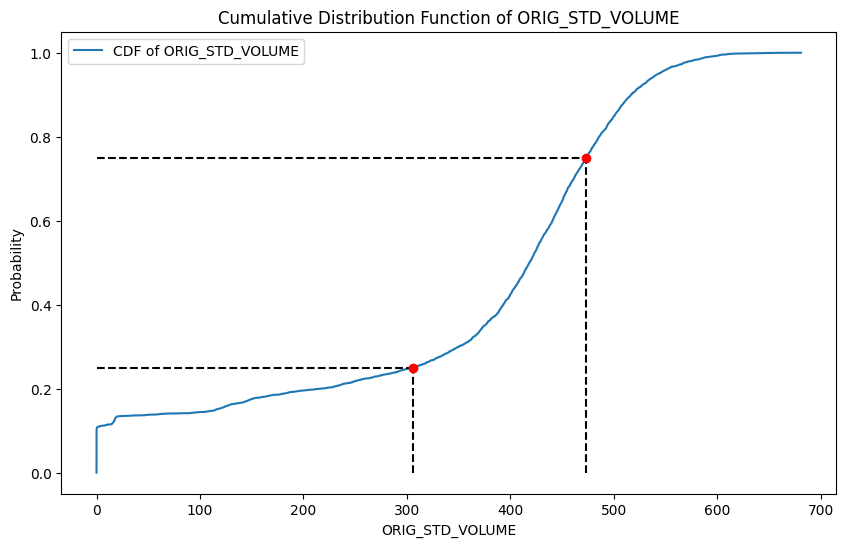

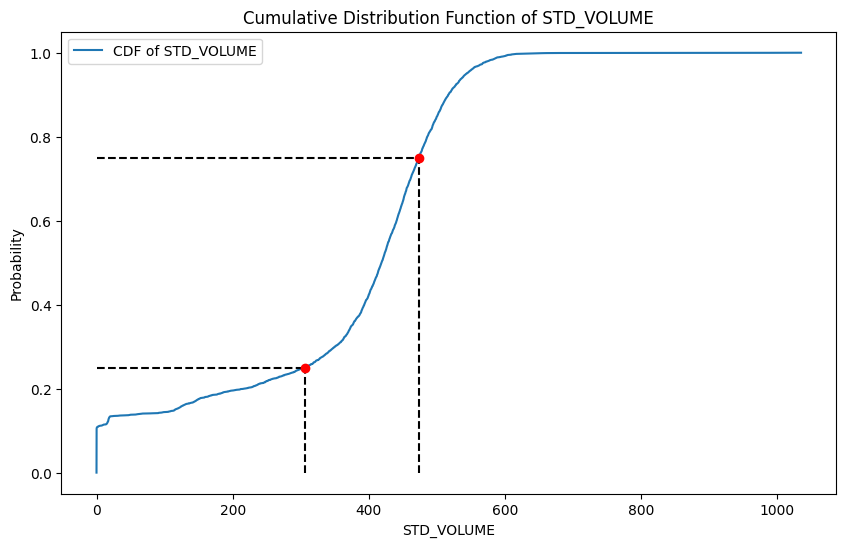

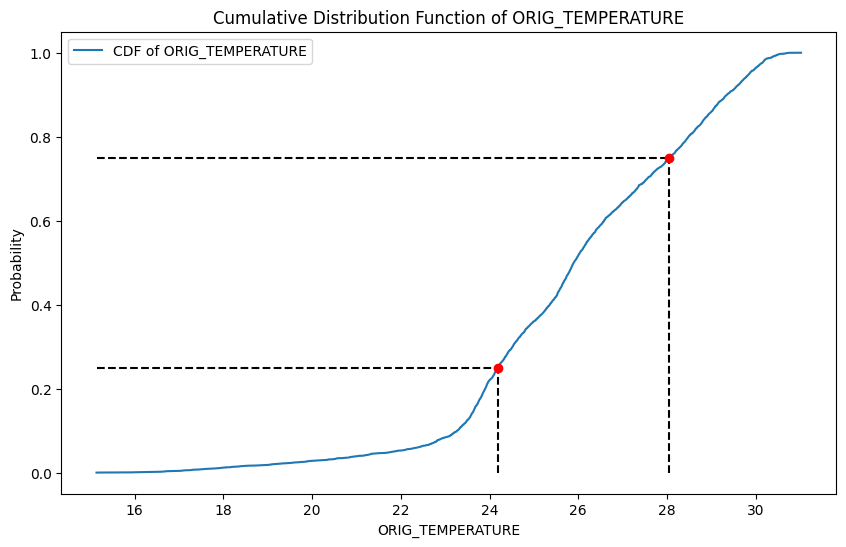

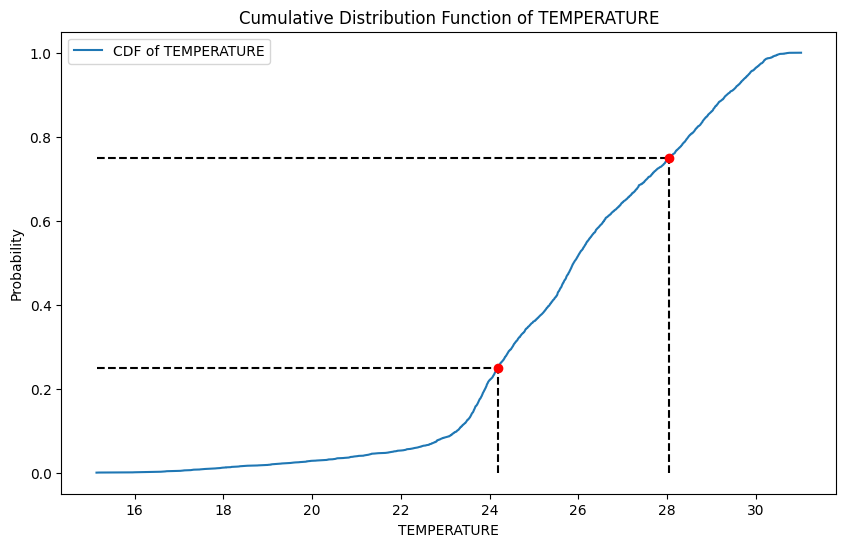

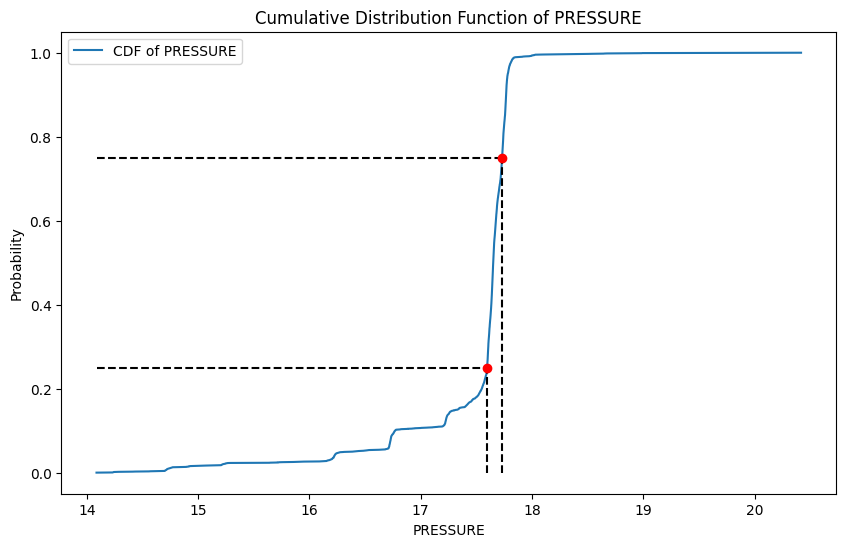

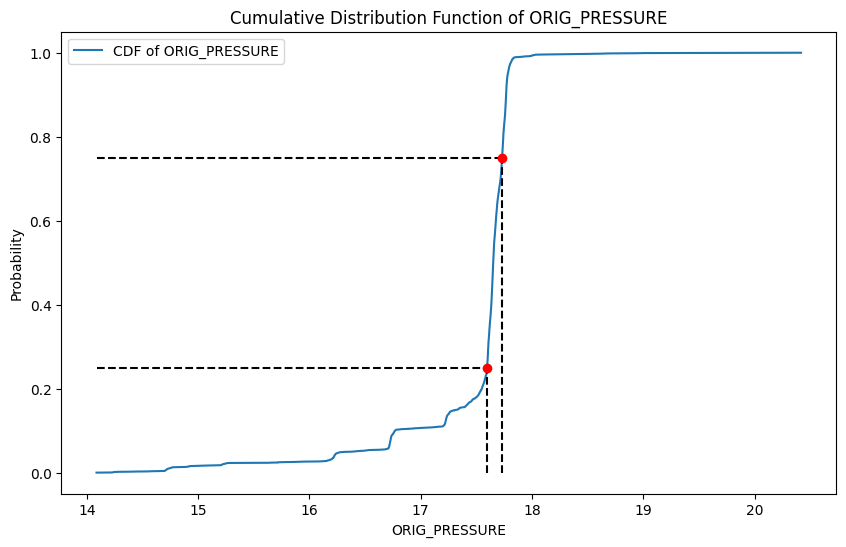

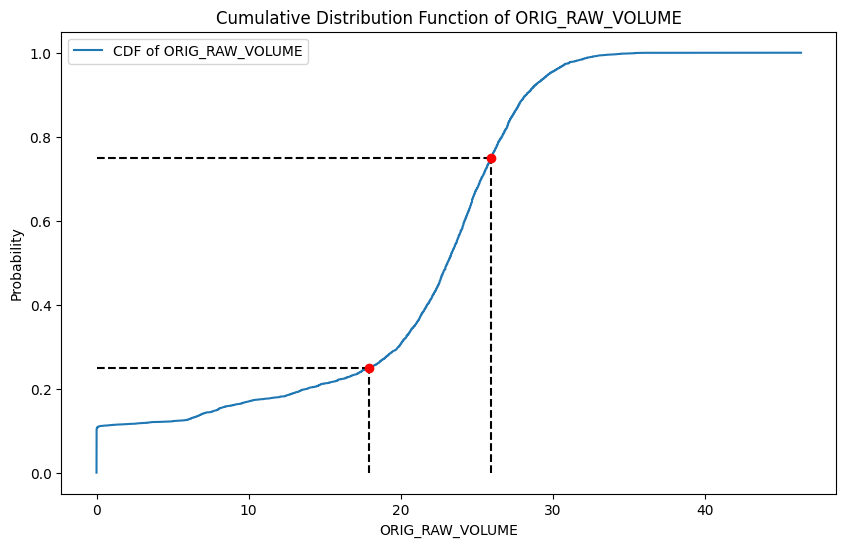

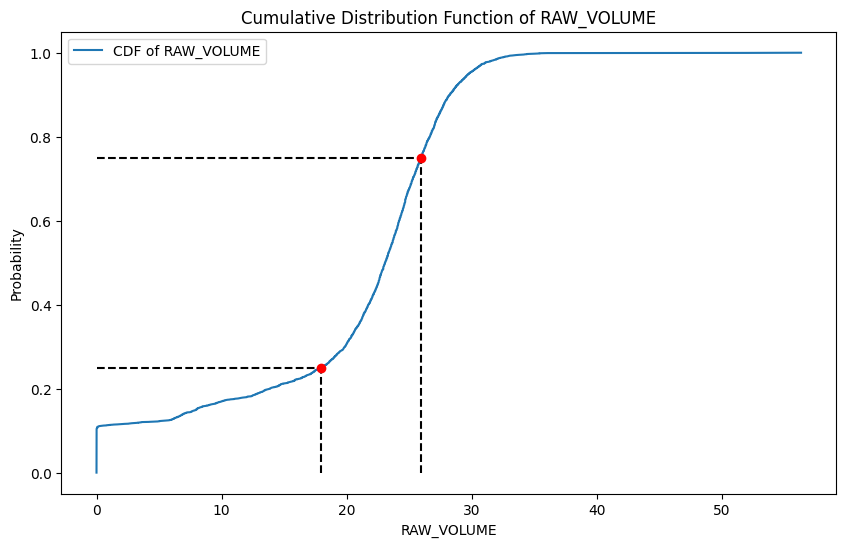

In [8]:
for var in variables:
    # Calculate the cumulative distribution function (CDF)
    sorted_data = np.sort(sampled_e1[var])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Specify probabilities
    p_1 = 0.25
    p_2 = 0.75
    ps = (p_1, p_2)
    
    # Calculate the quantiles
    qs = np.percentile(sorted_data, [p * 100 for p in ps])
    
    # Plot the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_data, cdf, label=f'CDF of {var}')
    
    # Add vertical lines for the quantiles
    plt.vlines(
        x=qs,
        ymin=0,
        ymax=ps,
        color='black',
        linestyle='dashed'
    )
    
    # Add horizontal lines for the probabilities
    plt.hlines(
        y=ps,
        xmin=sorted_data[0],
        xmax=qs,
        color='black',
        linestyle='dashed'
    )
    
    # Add scatter points for the quantiles
    plt.scatter(
        x=qs,
        y=ps,
        color='red',
        zorder=2
    )
    
    plt.title(f'Cumulative Distribution Function of {var}')
    plt.xlabel(var)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

- Estabilidad de las Variables: Tanto la temperatura como la presión presentan distribuciones bien definidas y sin valores extremos, lo que sugiere un control adecuado en las condiciones operativas.
- Volumen con Mayor Variabilidad: El volumen es la variable que presenta más dispersión y requiere un monitoreo más detallado para identificar posibles anomalías o patrones operativos.
- Valores Percentiles Útiles para Monitoreo: Las marcas en los percentiles 25 y 75 pueden ser utilizadas como referencia para definir umbrales normales y detectar posibles eventos fuera de lo común.

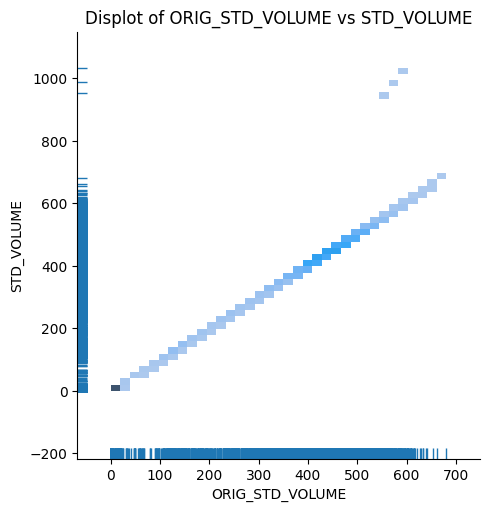

In [9]:
sns.displot(
    data=sampled_e1,
    x='ORIG_STD_VOLUME',
    y='STD_VOLUME',
    rug=True
)
plt.title('Displot of ORIG_STD_VOLUME vs STD_VOLUME')
plt.xlabel('ORIG_STD_VOLUME')
plt.ylabel('STD_VOLUME')
plt.show()

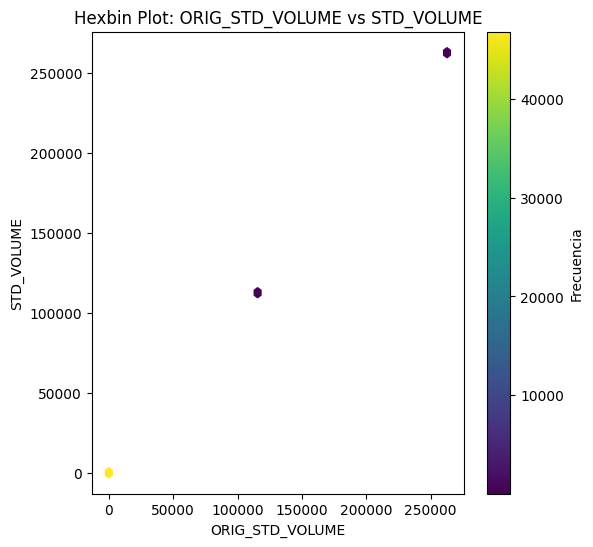

In [10]:
plt.figure(figsize=(6, 6))

# Hexbin con 50 bins y escala logarítmica para resaltar diferencias de densidad
plt.hexbin(e1['ORIG_STD_VOLUME'], e1['STD_VOLUME'], gridsize=50, mincnt=1)

# Mejoras visuales
plt.colorbar(label="Frecuencia")
plt.xlabel("ORIG_STD_VOLUME")
plt.ylabel("STD_VOLUME")
plt.title("Hexbin Plot: ORIG_STD_VOLUME vs STD_VOLUME")

plt.show()


En términos operativos, los puntos morados pueden representar picos de demanda inusuales o fugas en el sistema.
También podrían indicar errores en la captura de datos o registros erróneos.

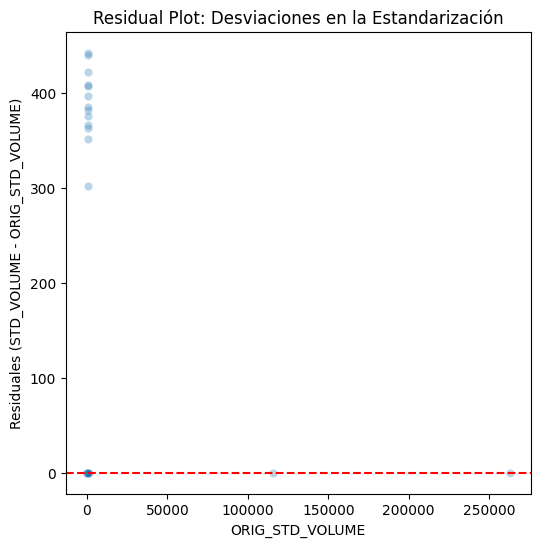

In [11]:
import numpy as np

# Calcular residuales
e1["Residuals"] = e1["STD_VOLUME"] - e1["ORIG_STD_VOLUME"]

plt.figure(figsize=(6, 6))

# Scatter plot de residuales
sns.scatterplot(x=e1["ORIG_STD_VOLUME"], y=e1["Residuals"], alpha=0.3)

# Línea base en 0 para ver desviaciones
plt.axhline(y=0, color="red", linestyle="--")

# Mejoras visuales
plt.xlabel("ORIG_STD_VOLUME")
plt.ylabel("Residuales (STD_VOLUME - ORIG_STD_VOLUME)")
plt.title("Residual Plot: Desviaciones en la Estandarización")

plt.show()


- La mayoría de los puntos están alineados en la línea roja (residuo = 0), lo que indica que la conversión de ORIG_STD_VOLUME a STD_VOLUME es consistente.
- Sin embargo, en valores bajos de ORIG_STD_VOLUME, se observan algunos puntos con residuales altos (300-400), lo que sugiere que en ciertos casos hay diferencias notables en la estandarización del volumen.

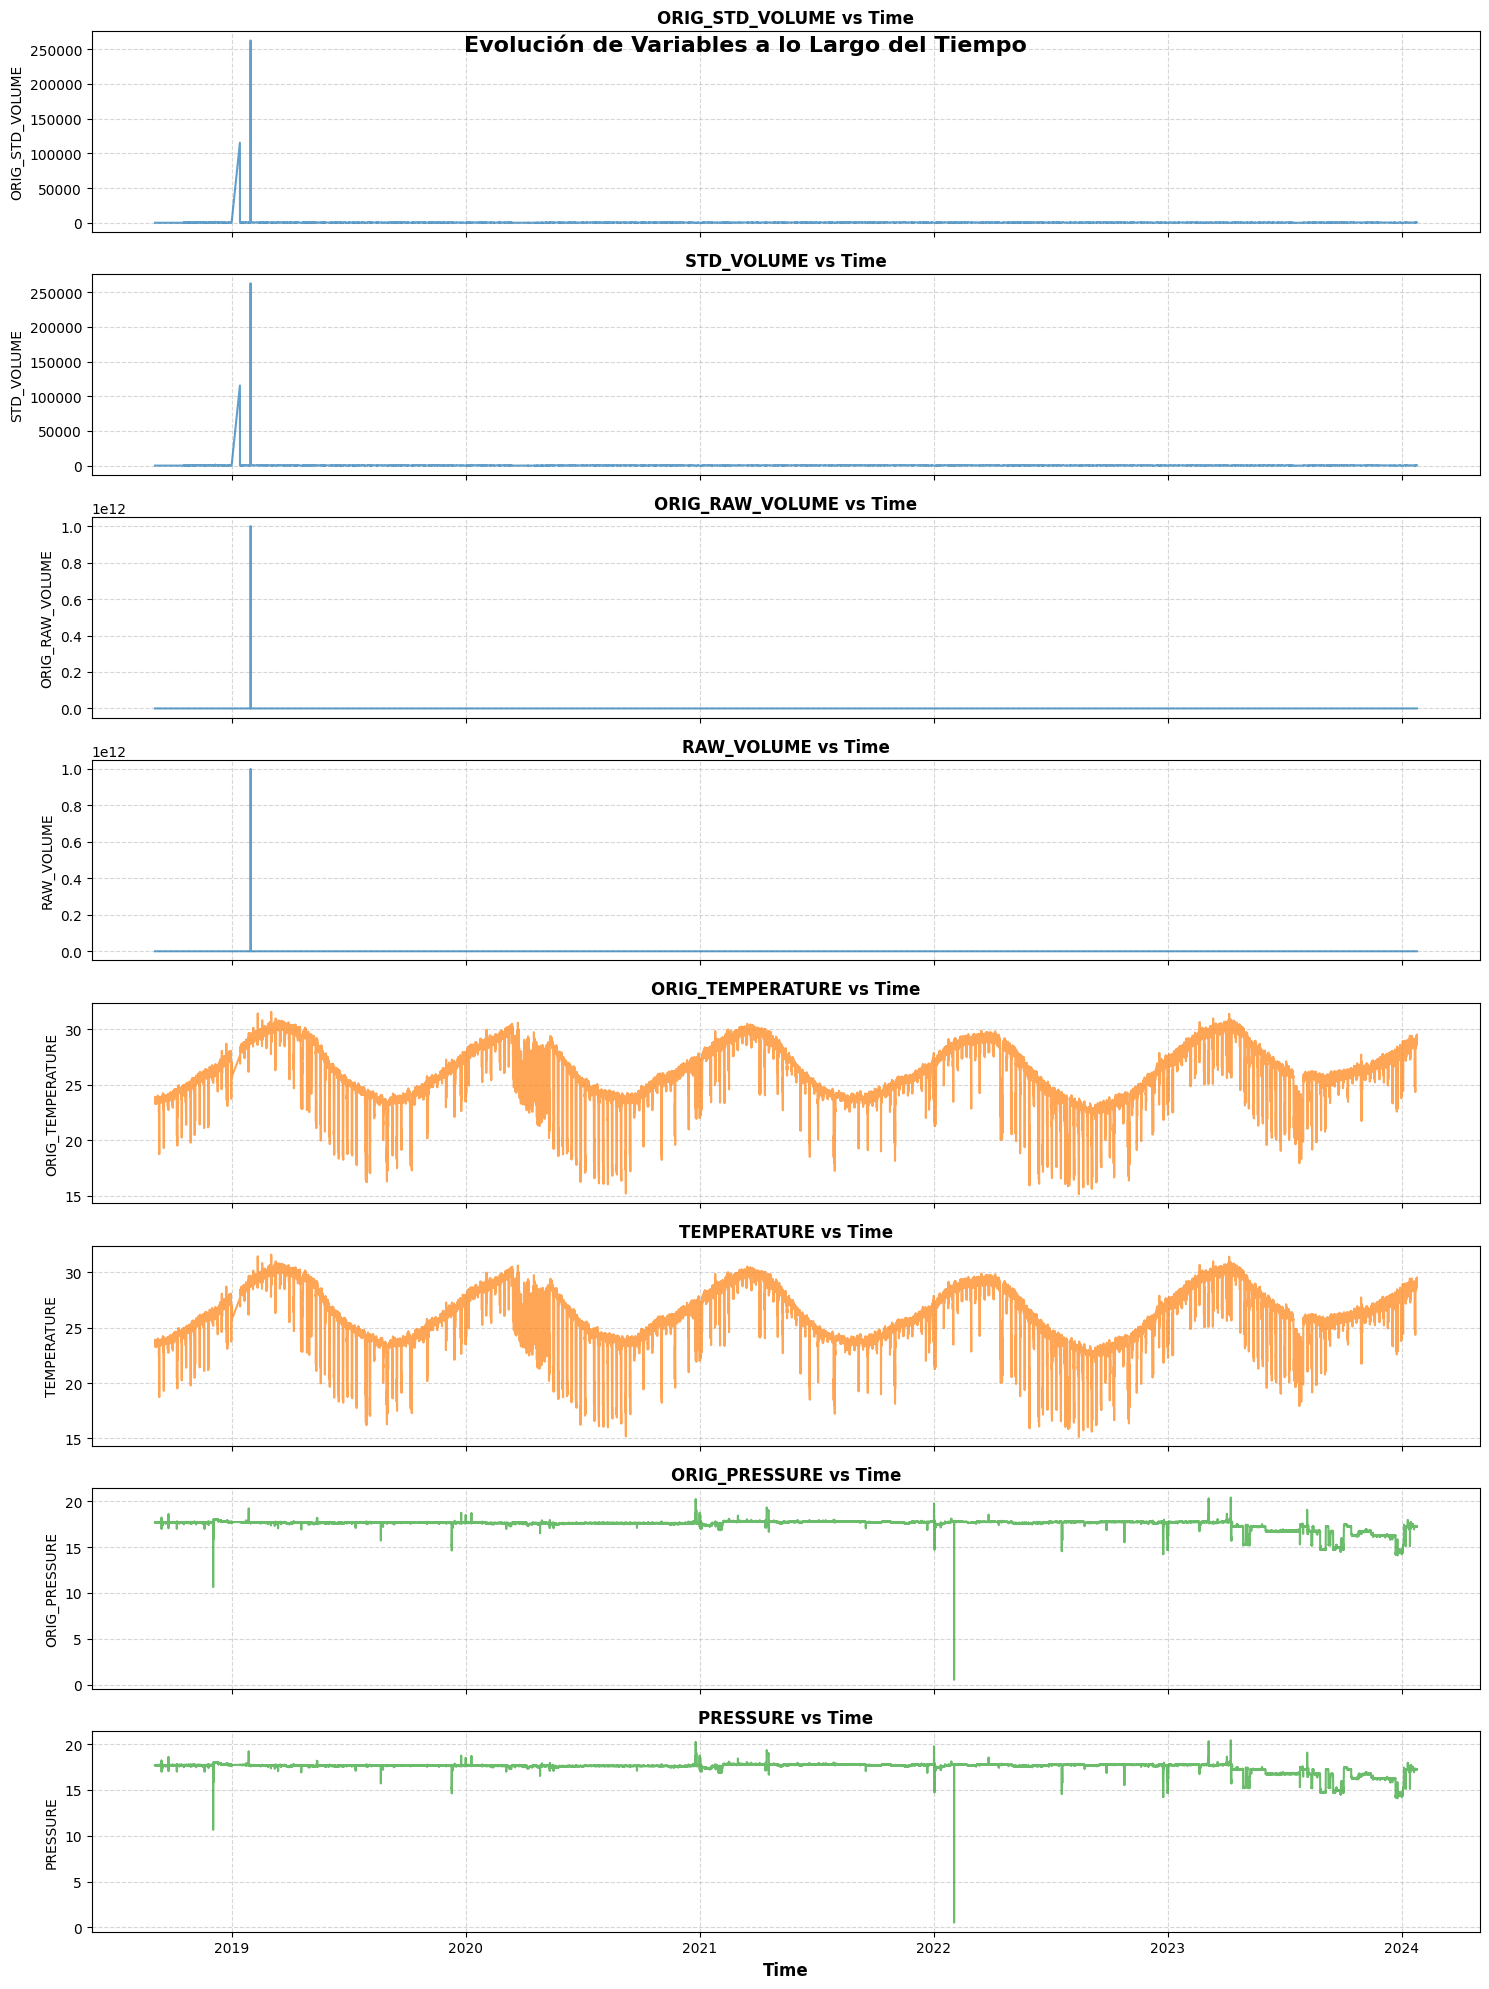

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir la columna EFFECTIVE_DATE a datetime si no lo está
e1['EFFECTIVE_DATE'] = pd.to_datetime(e1['EFFECTIVE_DATE'])

# Definir las variables por categorías
volumen_vars = ['ORIG_STD_VOLUME', 'STD_VOLUME', 'ORIG_RAW_VOLUME', 'RAW_VOLUME']
temperatura_vars = ['ORIG_TEMPERATURE', 'TEMPERATURE']
presion_vars = ['ORIG_PRESSURE', 'PRESSURE']

# Unificar todas las variables en una sola lista para iteración
variables = volumen_vars + temperatura_vars + presion_vars

# Definir colores para cada categoría
colores = {
    'Volumen': '#1f77b4',      # Azul
    'Temperatura': '#ff7f0e',  # Naranja
    'Presión': '#2ca02c'       # Verde
}

# Crear una figura con subgráficos
fig, axs = plt.subplots(len(variables), 1, figsize=(15, 20), sharex=True)

# Iterar sobre las variables y asignar color según su categoría
for i, var in enumerate(variables):
    if var in volumen_vars:
        color = colores['Volumen']
    elif var in temperatura_vars:
        color = colores['Temperatura']
    else:
        color = colores['Presión']
    
    sns.lineplot(data=e1, x='EFFECTIVE_DATE', y=var, ax=axs[i], color=color, alpha=0.7)
    
    axs[i].set_title(f'{var} vs Time', fontsize=12, fontweight='bold')
    axs[i].set_ylabel(var)
    axs[i].grid(True, linestyle='--', alpha=0.5)  # Agregar grid ligero para mejor legibilidad

# Ajustar el diseño y la etiqueta del eje X
axs[-1].set_xlabel('Time', fontsize=12, fontweight='bold')

# Espaciado óptimo entre subgráficos
plt.tight_layout()

# Título general de la figura
plt.suptitle("Evolución de Variables a lo Largo del Tiempo", fontsize=16, fontweight='bold')

plt.show()


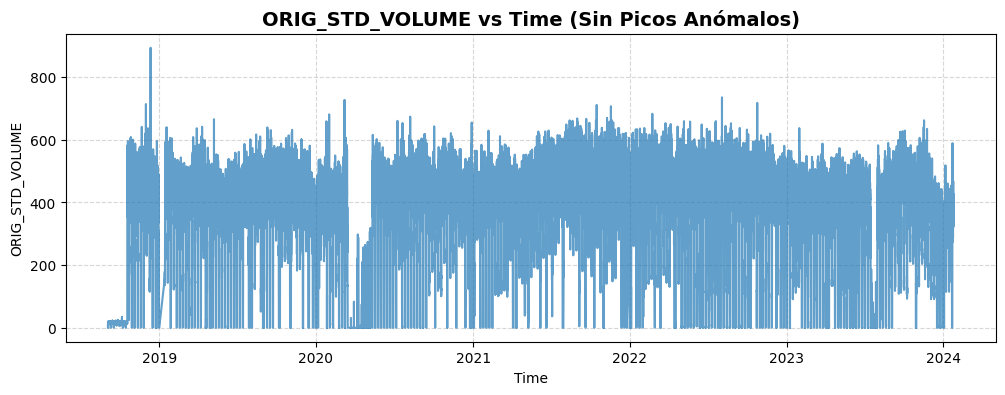

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumimos que ya tenemos los datos en un DataFrame llamado e1
# Primero, identificamos los dos valores más altos en ORIG_STD_VOLUME
top_values = e1['ORIG_STD_VOLUME'].nlargest(3)

# Filtramos los datos eliminando estos dos picos
e1_filtered = e1[~e1['ORIG_STD_VOLUME'].isin(top_values)]

# Crear la gráfica sin los picos
plt.figure(figsize=(12, 4))
plt.plot(e1_filtered['EFFECTIVE_DATE'], e1_filtered['ORIG_STD_VOLUME'], color='#1f77b4', alpha=0.7)
plt.title("ORIG_STD_VOLUME vs Time (Sin Picos Anómalos)", fontsize=14, fontweight='bold')
plt.xlabel("Time")
plt.ylabel("ORIG_STD_VOLUME")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()


- El 1400 podría también anomalía

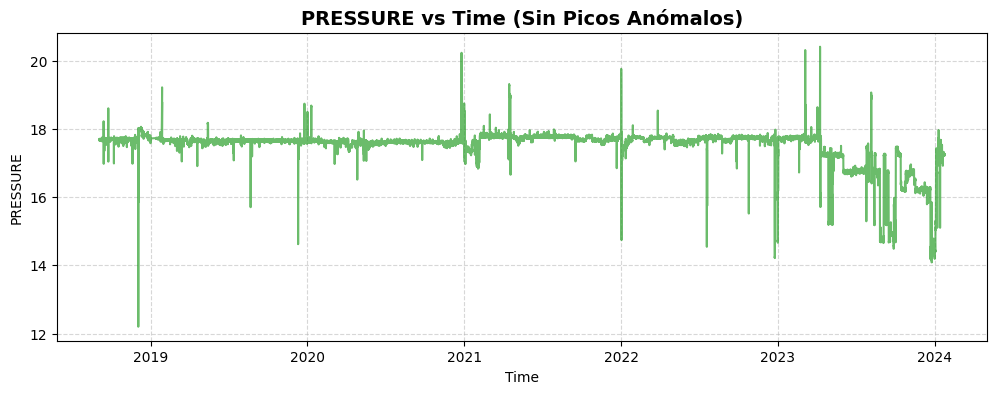

In [14]:
# Identificar los dos valores más altos en PRESSURE
top_values_pressure = e1['PRESSURE'].nlargest(2)
smallest_values_pressure = e1['PRESSURE'].nsmallest(3)

# Filtrar los datos eliminando estos dos picos
#e1_filtered_pressure = e1[~e1['PRESSURE'].isin(top_values_pressure)]
e1_filtered_pressure = e1[~e1['PRESSURE'].isin(smallest_values_pressure)]

# Crear la gráfica sin los picos en presión
plt.figure(figsize=(12, 4))
plt.plot(e1_filtered_pressure['EFFECTIVE_DATE'], e1_filtered_pressure['PRESSURE'], color='#2ca02c', alpha=0.7)
plt.title("PRESSURE vs Time (Sin Picos Anómalos)", fontsize=14, fontweight='bold')
plt.xlabel("Time")
plt.ylabel("PRESSURE")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()


🔴 Todavía hay eventos de presión baja que podrían ser de interés.
🔴 Algunas caídas abruptas pueden indicar fallos en sensores o eventos operativos específicos.
🔴 En 2023-2024, se ve más inestabilidad en la presión, lo que podría reflejar cambios en las condiciones del sistema o problemas operativos recientes.

In [15]:
# Crear un nuevo DataFrame con los datos filtrados
e1_filtered_data = e1.copy()

# Eliminar los 3 valores más altos de ORIG_STD_VOLUME
top_values_volume = e1['ORIG_STD_VOLUME'].nlargest(3)
e1_filtered_data = e1_filtered_data[~e1_filtered_data['ORIG_STD_VOLUME'].isin(top_values_volume)]

# Eliminar los 3 valores más bajos de PRESSURE
smallest_values_pressure = e1['PRESSURE'].nsmallest(3)
e1_filtered_data = e1_filtered_data[~e1_filtered_data['PRESSURE'].isin(smallest_values_pressure)]



C:\Users\diana\AppData\Local\Temp\ipykernel_23184\1841190838.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


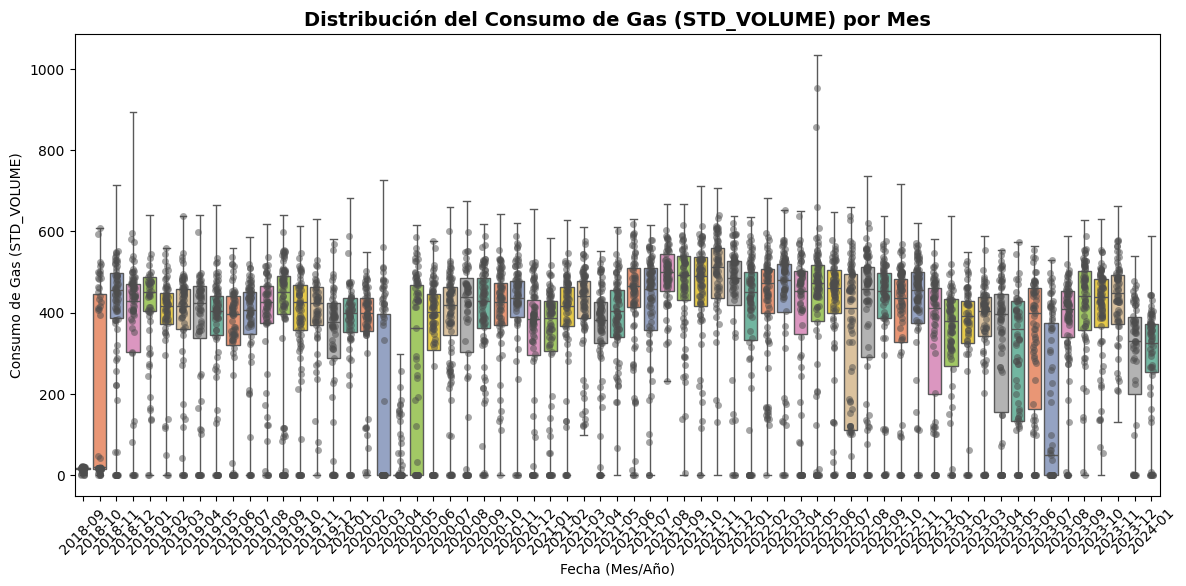

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear una copia del DataFrame procesado
processed_e1_df = e1_filtered_data.copy()

# Convertir la fecha a un formato de periodo mensual para mejor agrupación
processed_e1_df['YearMonth'] = processed_e1_df['EFFECTIVE_DATE'].dt.to_period("M")

# Configurar la figura
plt.figure(figsize=(14, 6))

# Crear el boxplot para el consumo de gas
ax = sns.boxplot(
    data=processed_e1_df,
    x='YearMonth',
    y='STD_VOLUME',  # También puedes probar con ORIG_STD_VOLUME
    palette='Set2',
    whis=np.inf  # Incluir todos los valores sin limitar los bigotes
)

# Añadir el stripplot para visualizar los valores individuales
ax = sns.stripplot(
    data=processed_e1_df.sample(frac=0.1, random_state=42),  # Muestrear para evitar sobrecarga
    x='YearMonth',
    y='STD_VOLUME',
    color='.3',
    alpha=0.5
)

# Configurar el título y etiquetas
plt.title('Distribución del Consumo de Gas (STD_VOLUME) por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Fecha (Mes/Año)')
plt.ylabel('Consumo de Gas (STD_VOLUME)')

# Rotar etiquetas del eje X para mejorar visibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


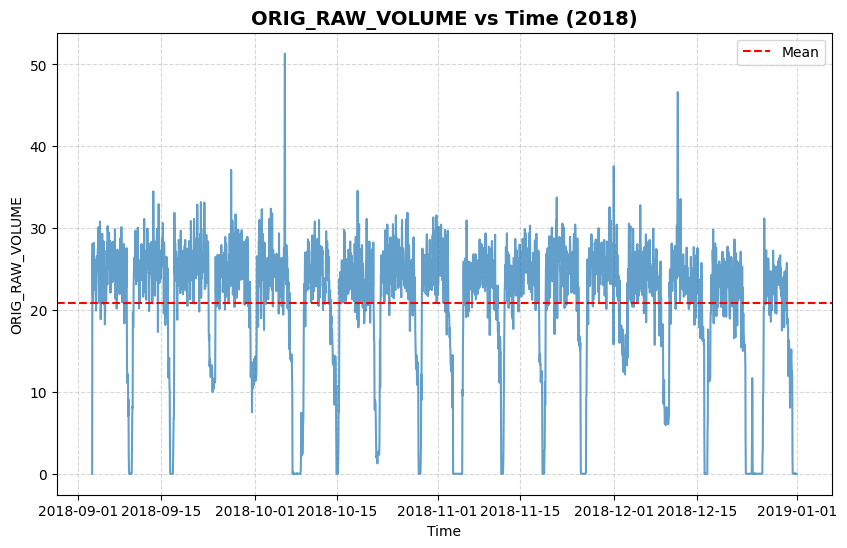

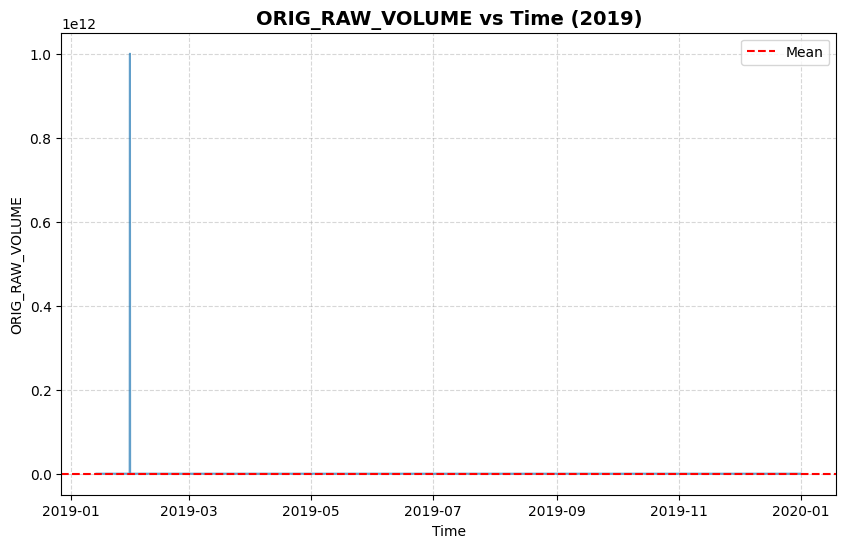

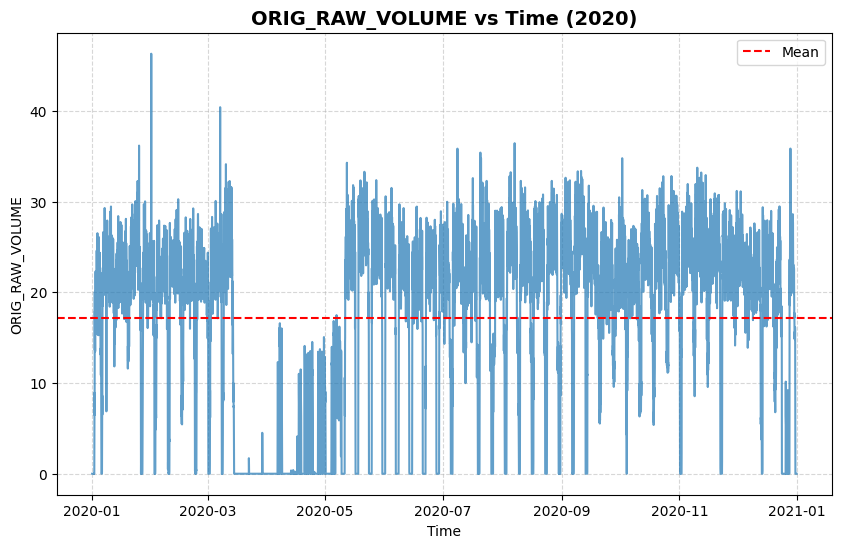

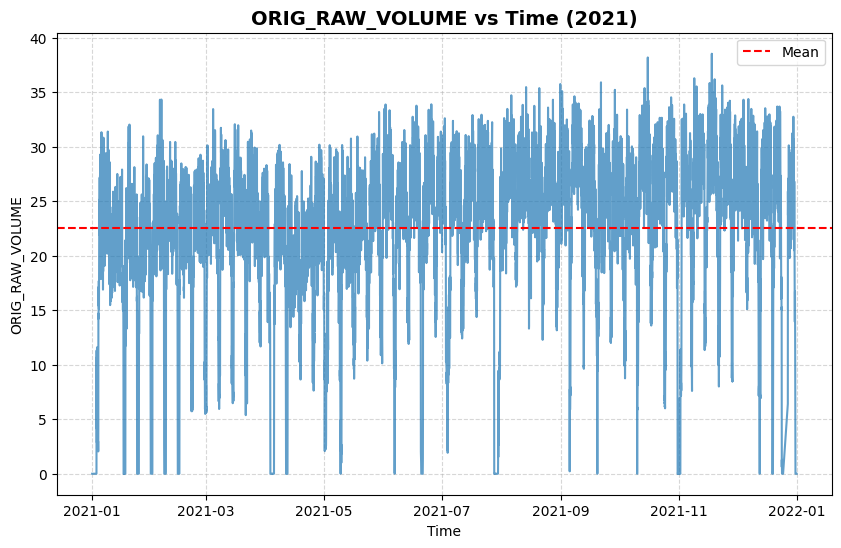

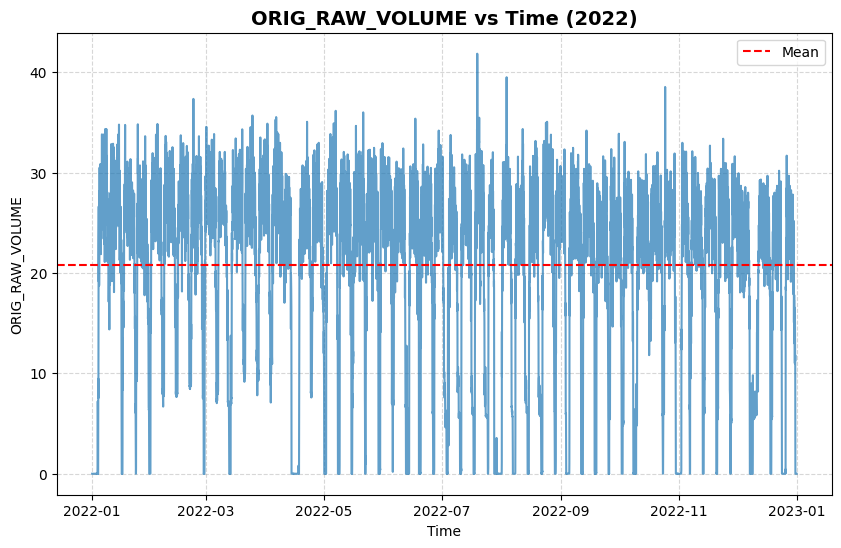

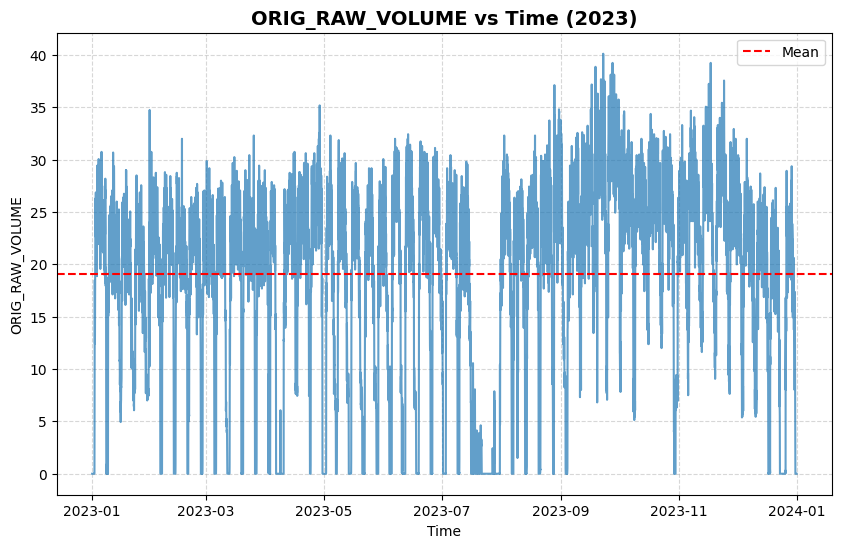

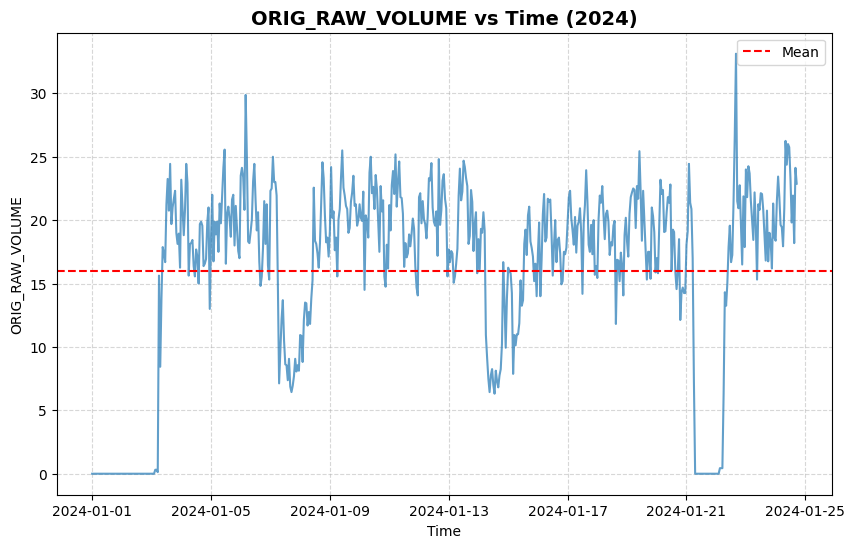

In [17]:
# Filtrar los datos por año y crear una gráfica para cada año
years = e1_filtered_data['EFFECTIVE_DATE'].dt.year.unique()
volumen_vars = ['ORIG_RAW_VOLUME']

for year in years:
    yearly_data = e1_filtered_data[e1_filtered_data['EFFECTIVE_DATE'].dt.year == year]
    
    for var in volumen_vars:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=yearly_data, x='EFFECTIVE_DATE', y=var, color=colores['Volumen'], alpha=0.7)
        
        plt.title(f'{var} vs Time ({year})', fontsize=14, fontweight='bold')
        plt.xlabel('Time')
        plt.ylabel(var)
        plt.grid(True, linestyle='--', alpha=0.5)
        
        # Principios de Gestalt: Proximidad y Similitud
        plt.axhline(y=yearly_data[var].mean(), color='red', linestyle='--', label='Mean')
        plt.legend()
        
        plt.show()

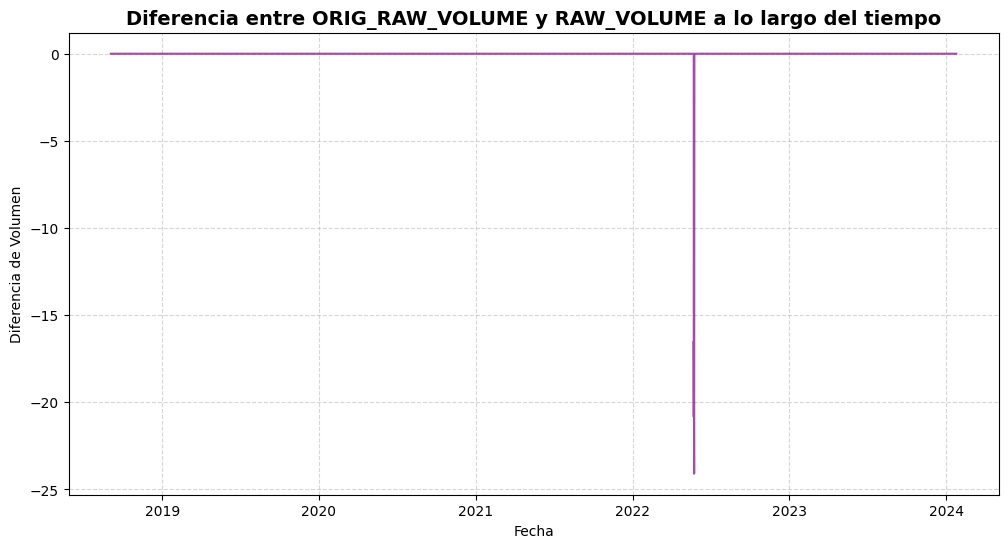

In [18]:
# Calcular la resta entre ORIG_RAW_VOLUME y RAW_VOLUME
e1['Volume_Difference'] = e1['ORIG_RAW_VOLUME'] - e1['RAW_VOLUME']

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(e1['EFFECTIVE_DATE'], e1['Volume_Difference'], color='purple', alpha=0.7)
plt.title("Diferencia entre ORIG_RAW_VOLUME y RAW_VOLUME a lo largo del tiempo", fontsize=14, fontweight='bold')
plt.xlabel("Fecha")
plt.ylabel("Diferencia de Volumen")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()

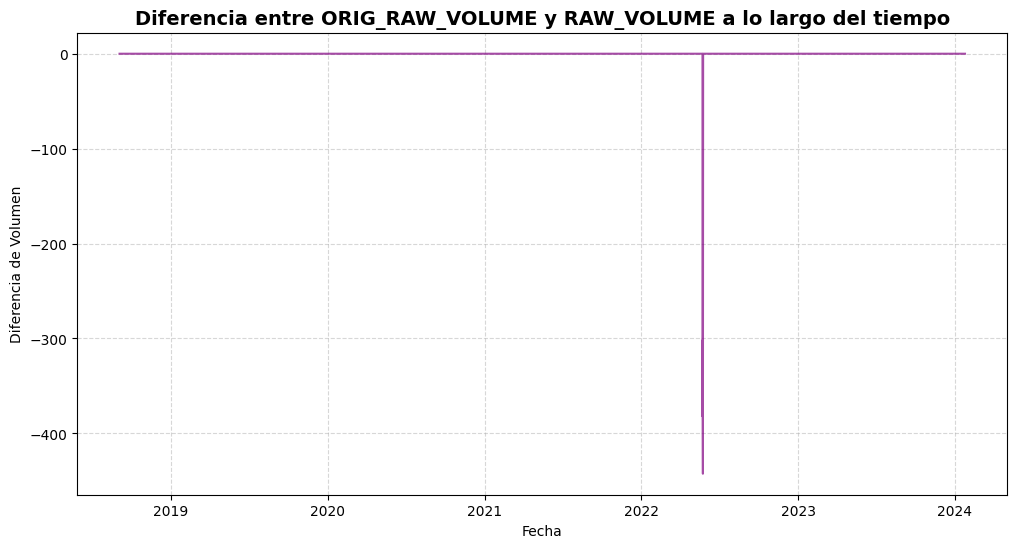

In [19]:
# Calcular la resta entre ORIG_RAW_VOLUME y RAW_VOLUME
e1['Volume_Difference'] = e1['ORIG_STD_VOLUME'] - e1['STD_VOLUME']

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(e1['EFFECTIVE_DATE'], e1['Volume_Difference'], color='purple', alpha=0.7)
plt.title("Diferencia entre ORIG_RAW_VOLUME y RAW_VOLUME a lo largo del tiempo", fontsize=14, fontweight='bold')
plt.xlabel("Fecha")
plt.ylabel("Diferencia de Volumen")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()

In [20]:
# Filtrar las filas donde la diferencia es mayor que 1
non_zero_diff = e1[e1['Volume_Difference'] <-1]

# Mostrar los valores y las fechas correspondientes
non_zero_diff[['EFFECTIVE_DATE', 'Volume_Difference']]

EFFECTIVE_DATE  Volume_Difference
32190 2022-05-23 07:00:00        -381.975707
32191 2022-05-23 08:00:00        -352.037891
32192 2022-05-23 09:00:00        -301.830165
32193 2022-05-23 21:00:00        -384.894760
32194 2022-05-23 22:00:00        -397.364958
32195 2022-05-23 23:00:00        -366.656512
32196 2022-05-24 00:00:00        -363.083590
32197 2022-05-24 01:00:00        -422.375411
32198 2022-05-24 02:00:00        -408.130429
32199 2022-05-24 03:00:00        -407.196332
32200 2022-05-24 04:00:00        -442.481854
32201 2022-05-24 05:00:00        -440.543602
32202 2022-05-24 06:00:00        -375.553788

In [21]:
# Filtrar las filas donde la diferencia no es 0
non_zero_diff = e1[e1['Volume_Difference'] != 0]

# Mostrar los valores y las fechas correspondientes
non_zero_diff[['EFFECTIVE_DATE', 'Volume_Difference']]

EFFECTIVE_DATE  Volume_Difference
1     2018-09-03 10:00:00          -0.000006
2     2018-09-03 11:00:00          -0.000007
3     2018-09-03 12:00:00          -0.000005
4     2018-09-03 13:00:00          -0.000005
5     2018-09-03 14:00:00          -0.000006
...                   ...                ...
32198 2022-05-24 02:00:00        -408.130429
32199 2022-05-24 03:00:00        -407.196332
32200 2022-05-24 04:00:00        -442.481854
32201 2022-05-24 05:00:00        -440.543602
32202 2022-05-24 06:00:00        -375.553788

[1678 rows x 2 columns]

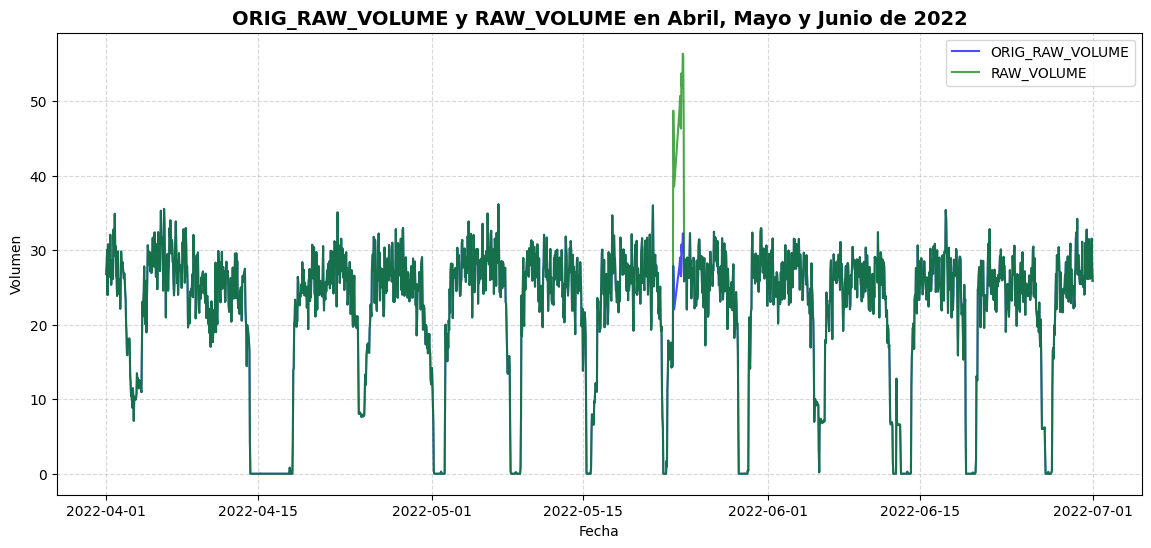

In [25]:
# Filtrar los datos para el año 2022 y los meses 04, 05 y 06
filtered_data_2022 = e1_filtered_data[(e1_filtered_data['EFFECTIVE_DATE'].dt.year == 2022) & 
                                      (e1_filtered_data['EFFECTIVE_DATE'].dt.month.isin([4,5,6]))]

# Crear la gráfica
plt.figure(figsize=(14, 6))
plt.plot(filtered_data_2022['EFFECTIVE_DATE'], filtered_data_2022['ORIG_RAW_VOLUME'], label='ORIG_RAW_VOLUME', color='blue', alpha=0.7)
plt.plot(filtered_data_2022['EFFECTIVE_DATE'], filtered_data_2022['RAW_VOLUME'], label='RAW_VOLUME', color='green', alpha=0.7)

# Configurar el título y etiquetas
plt.title('ORIG_RAW_VOLUME y RAW_VOLUME en Abril, Mayo y Junio de 2022', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()

In [23]:
# Identificar el valor anómalo en el año 2019
anomalo_2019 = e1[(e1['EFFECTIVE_DATE'].dt.year == 2019) & (e1['ORIG_STD_VOLUME'] == e1['ORIG_STD_VOLUME'].max())]

# Eliminar el valor anómalo del DataFrame
e1_sin_anomalo_2019 = e1.drop(anomalo_2019.index)

# Verificar que el dato anómalo ha sido eliminado
print(e1_sin_anomalo_2019[e1_sin_anomalo_2019['EFFECTIVE_DATE'].dt.year == 2019])

       ORIG_STD_VOLUME     STD_VOLUME  ORIG_TEMPERATURE  TEMPERATURE  \
2865     115388.249999  115388.249999         27.638117    27.638117   
2866        159.531006     159.531006         27.479893    27.479893   
2867        165.656006     165.656006         27.402456    27.402456   
2868        136.125000     136.125000         27.243212    27.243212   
2869        180.531998     180.531998         27.279442    27.279442   
...                ...            ...               ...          ...   
11307         0.000000       0.000000         27.595379    27.595379   
11308         0.000000       0.000000         27.105980    27.105980   
11309         0.000000       0.000000         26.655720    26.655720   
11310         0.062500       0.062500         26.187841    26.187841   
11311         0.000000       0.000000         25.908897    25.908897   

        PRESSURE  ORIG_PRESSURE  ORIG_RAW_VOLUME  RAW_VOLUME  \
2865   17.736219      17.736219         6076.500    6076.500   
2866   

C:\Users\diana\AppData\Local\Temp\ipykernel_23184\3458049125.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_week_2022['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)


DBSCAN_Cluster
0    169
Name: count, dtype: int64


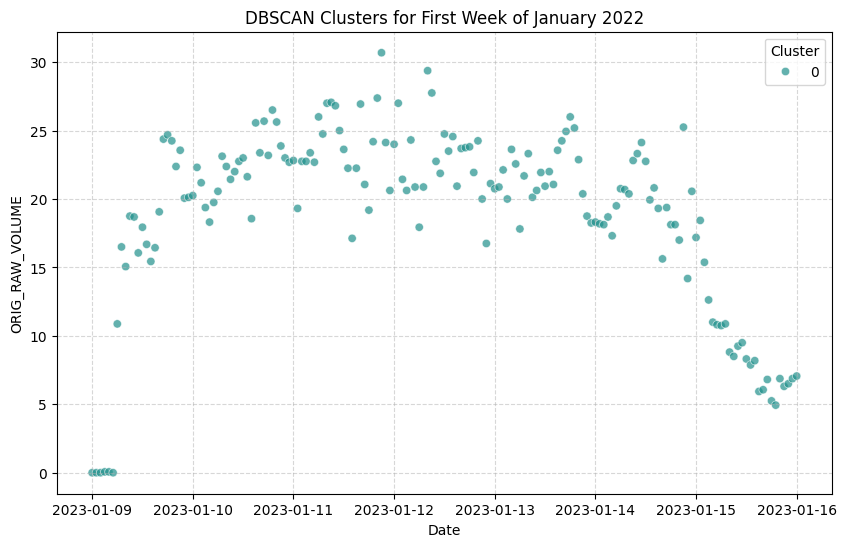

In [27]:
from sklearn.cluster import DBSCAN
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler

# Filtrar los datos para la primera semana de enero de 2022
first_week_2022 = e1_filtered_data[(e1_filtered_data['EFFECTIVE_DATE'] >= '2023-01-09') & 
                                   (e1_filtered_data['EFFECTIVE_DATE'] <= '2023-01-16')]

# Seleccionar las columnas relevantes para clustering
columns_for_clustering = [ 'ORIG_RAW_VOLUME']

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(first_week_2022[columns_for_clustering])

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2)
first_week_2022['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Imprimir los clusters y sus counts
cluster_counts = first_week_2022['DBSCAN_Cluster'].value_counts()
print(cluster_counts)

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_week_2022, x='EFFECTIVE_DATE', y='ORIG_RAW_VOLUME', hue='DBSCAN_Cluster', palette='viridis', alpha=0.7)
plt.title('DBSCAN Clusters for First Week of January 2022')
plt.xlabel('Date')
plt.ylabel('ORIG_RAW_VOLUME')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Conclusiones



In [153]:
e1 = pd.read_excel(r"C:/Users/diana/OneDrive - Universidad de los Andes/Documentos/9no Semestre/TesisGEB_AlejaYCami/Repositorio/ProyectoGradoGEB/datos/EICH101.xlsx")

In [154]:
# Convertir la columna EFFECTIVE_DATE a datetime si no lo está
e1['EFFECTIVE_DATE'] = pd.to_datetime(e1['EFFECTIVE_DATE'])

# Filtrar los datos para el año 2022
filtered_data_2022 = e1[e1['EFFECTIVE_DATE'].dt.year == 2022]



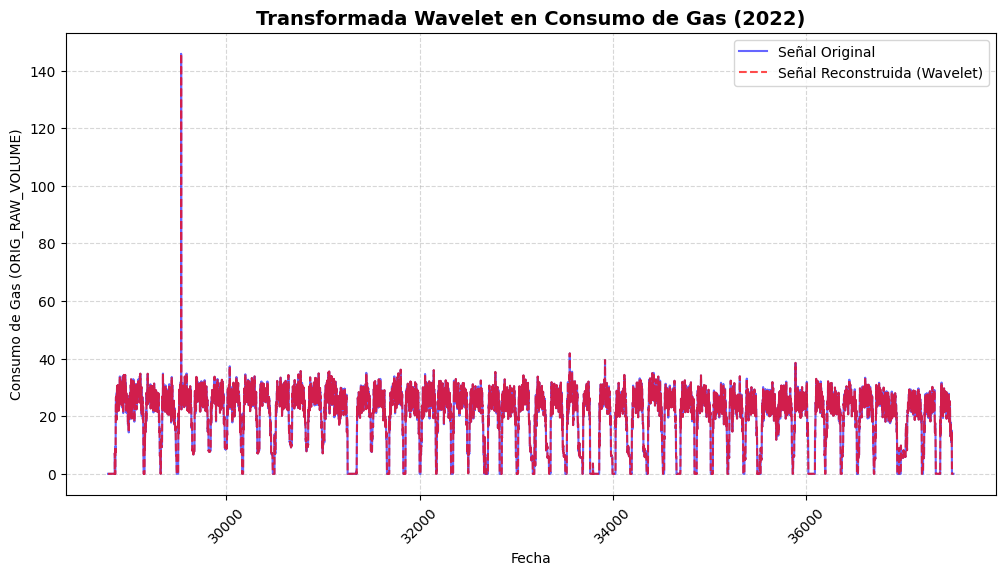

In [155]:
import pywt
import numpy as np

# Extraer los valores de ORIG_RAW_VOLUME para el año 2022
signal = filtered_data_2022['ORIG_RAW_VOLUME'].dropna().values

# Aplicar la Transformada Wavelet Discreta (DWT) usando la wavelet 'db4'
coeffs = pywt.wavedec(signal, wavelet='db4', level=5)

# Reconstrucción de la señal a partir de los coeficientes
reconstructed_signal = pywt.waverec(coeffs, wavelet='db4')

# Ajustar la longitud de la señal reconstruida para coincidir con la original
reconstructed_signal = reconstructed_signal[:len(signal)]

# Graficar la señal original y la reconstruida
plt.figure(figsize=(12,6))
plt.plot(filtered_data_2022.index[:len(signal)], signal, label='Señal Original', color='blue', alpha=0.6)
plt.plot(filtered_data_2022.index[:len(signal)], reconstructed_signal, label='Señal Reconstruida (Wavelet)', color='red', linestyle='dashed', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Consumo de Gas (ORIG_RAW_VOLUME)')
plt.title('Transformada Wavelet en Consumo de Gas (2022)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.show()


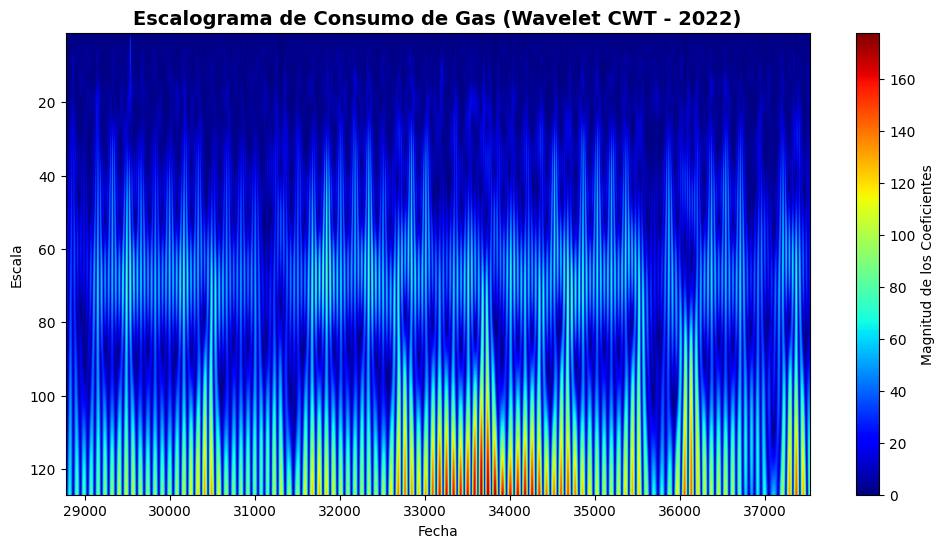

In [156]:
# Aplicar la Transformada Wavelet Continua (CWT)
scales = np.arange(1, 128)  # Definir escalas para la transformada
coefficients, frequencies = pywt.cwt(signal, scales, 'morl')  # Usar la wavelet Morlet

# Graficar el escalograma correctamente con imshow
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[filtered_data_2022.index.min(), filtered_data_2022.index.max(), scales[-1], scales[0]])
plt.colorbar(label="Magnitud de los Coeficientes")
plt.xlabel("Fecha")
plt.ylabel("Escala")
plt.title("Escalograma de Consumo de Gas (Wavelet CWT - 2022)", fontsize=14, fontweight="bold")
plt.show()


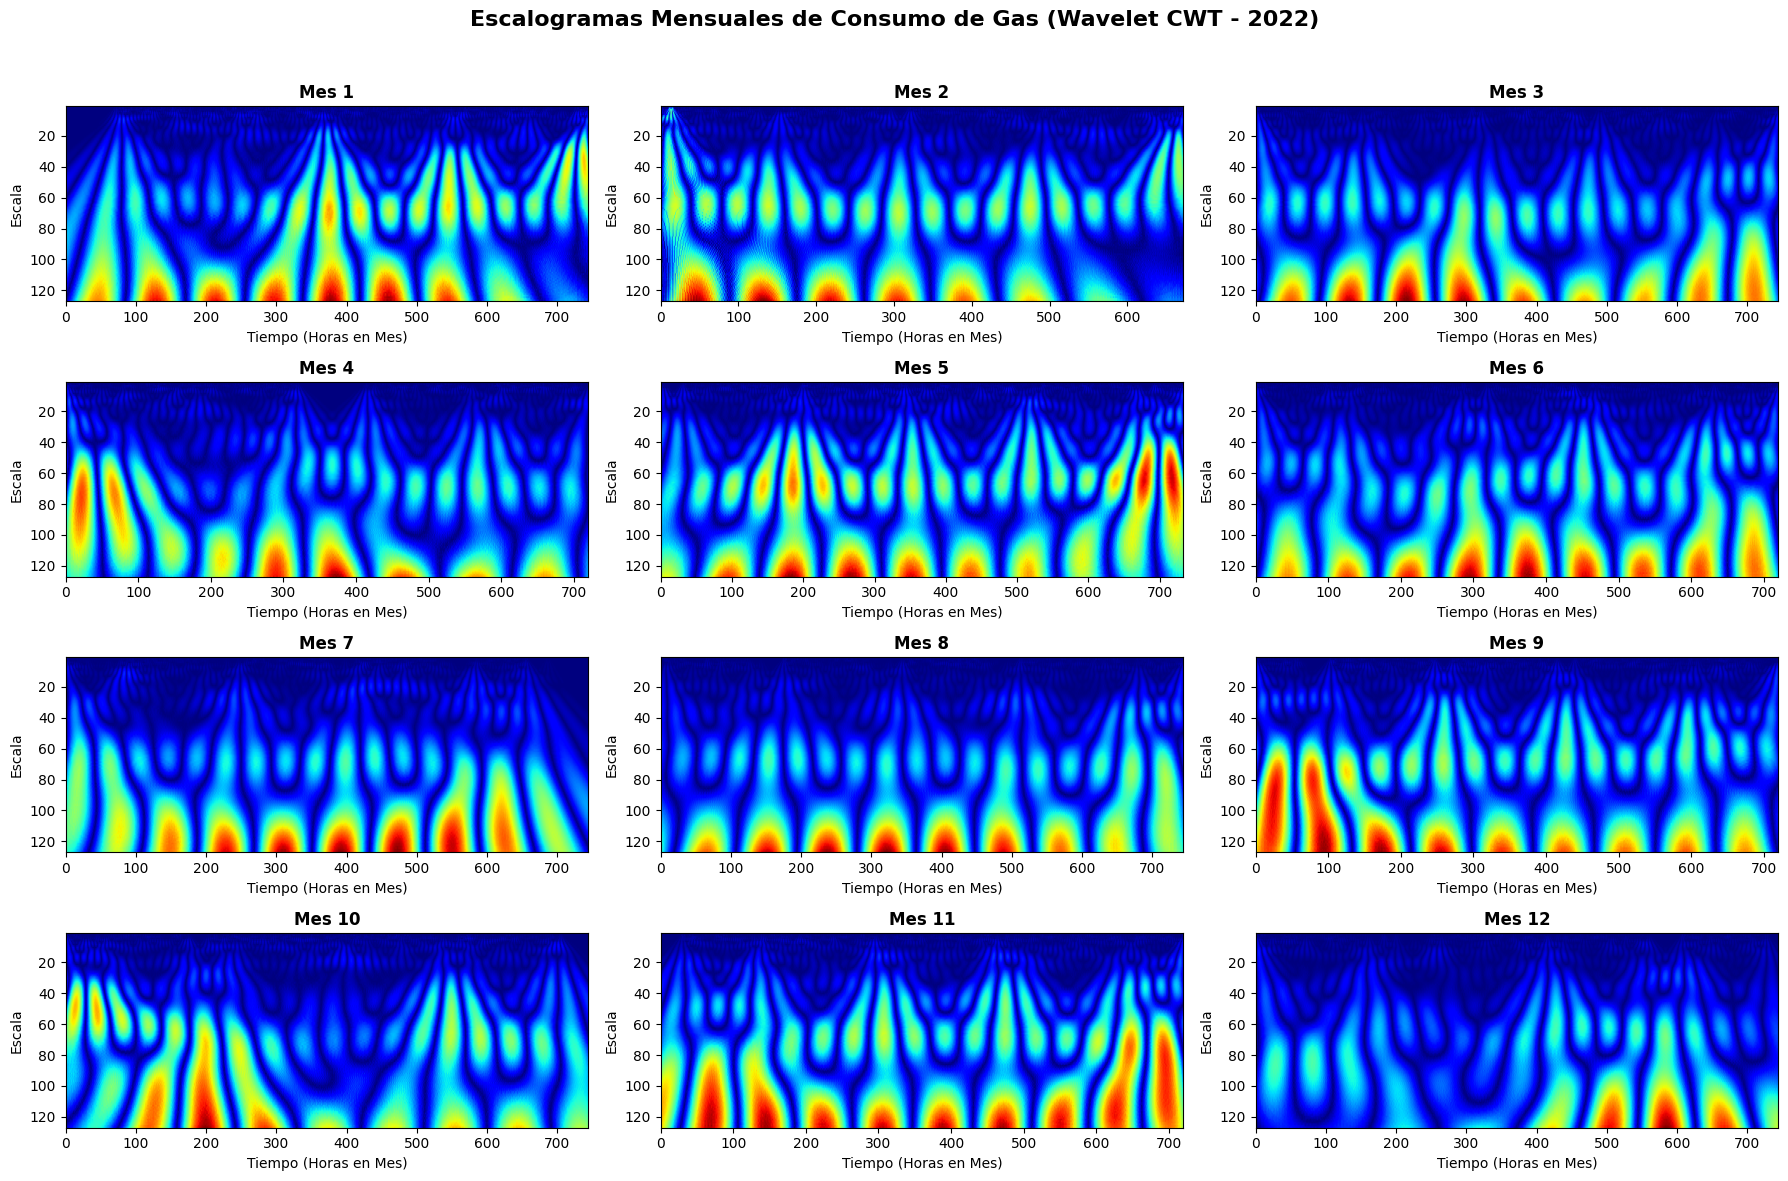

In [157]:
# Crear una figura con subgráficos para cada mes del 2022
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  # 4 filas, 3 columnas para los 12 meses
fig.suptitle("Escalogramas Mensuales de Consumo de Gas (Wavelet CWT - 2022)", fontsize=16, fontweight="bold")

# Iterar sobre cada mes del 2022
for i, month in enumerate(range(1, 13)):
    # Filtrar los datos para el mes actual
    df_month = filtered_data_2022[filtered_data_2022['EFFECTIVE_DATE'].dt.month == month]
    signal_month = df_month['ORIG_RAW_VOLUME'].values
    
    # Aplicar la Transformada Wavelet Continua (CWT) con wavelet Morlet
    coefficients, frequencies = pywt.cwt(signal_month, scales, 'morl')
    
    # Seleccionar el eje para la gráfica actual
    ax = axes[i // 3, i % 3]  # Posición en la cuadrícula
    
    # Graficar el escalograma para el mes actual
    ax.imshow(np.abs(coefficients), aspect='auto', cmap='jet',
              extent=[0, len(signal_month), scales[-1], scales[0]])
    
    # Configurar etiquetas y título
    ax.set_title(f"Mes {month}", fontsize=12, fontweight="bold")
    ax.set_xlabel("Tiempo (Horas en Mes)")
    ax.set_ylabel("Escala")

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


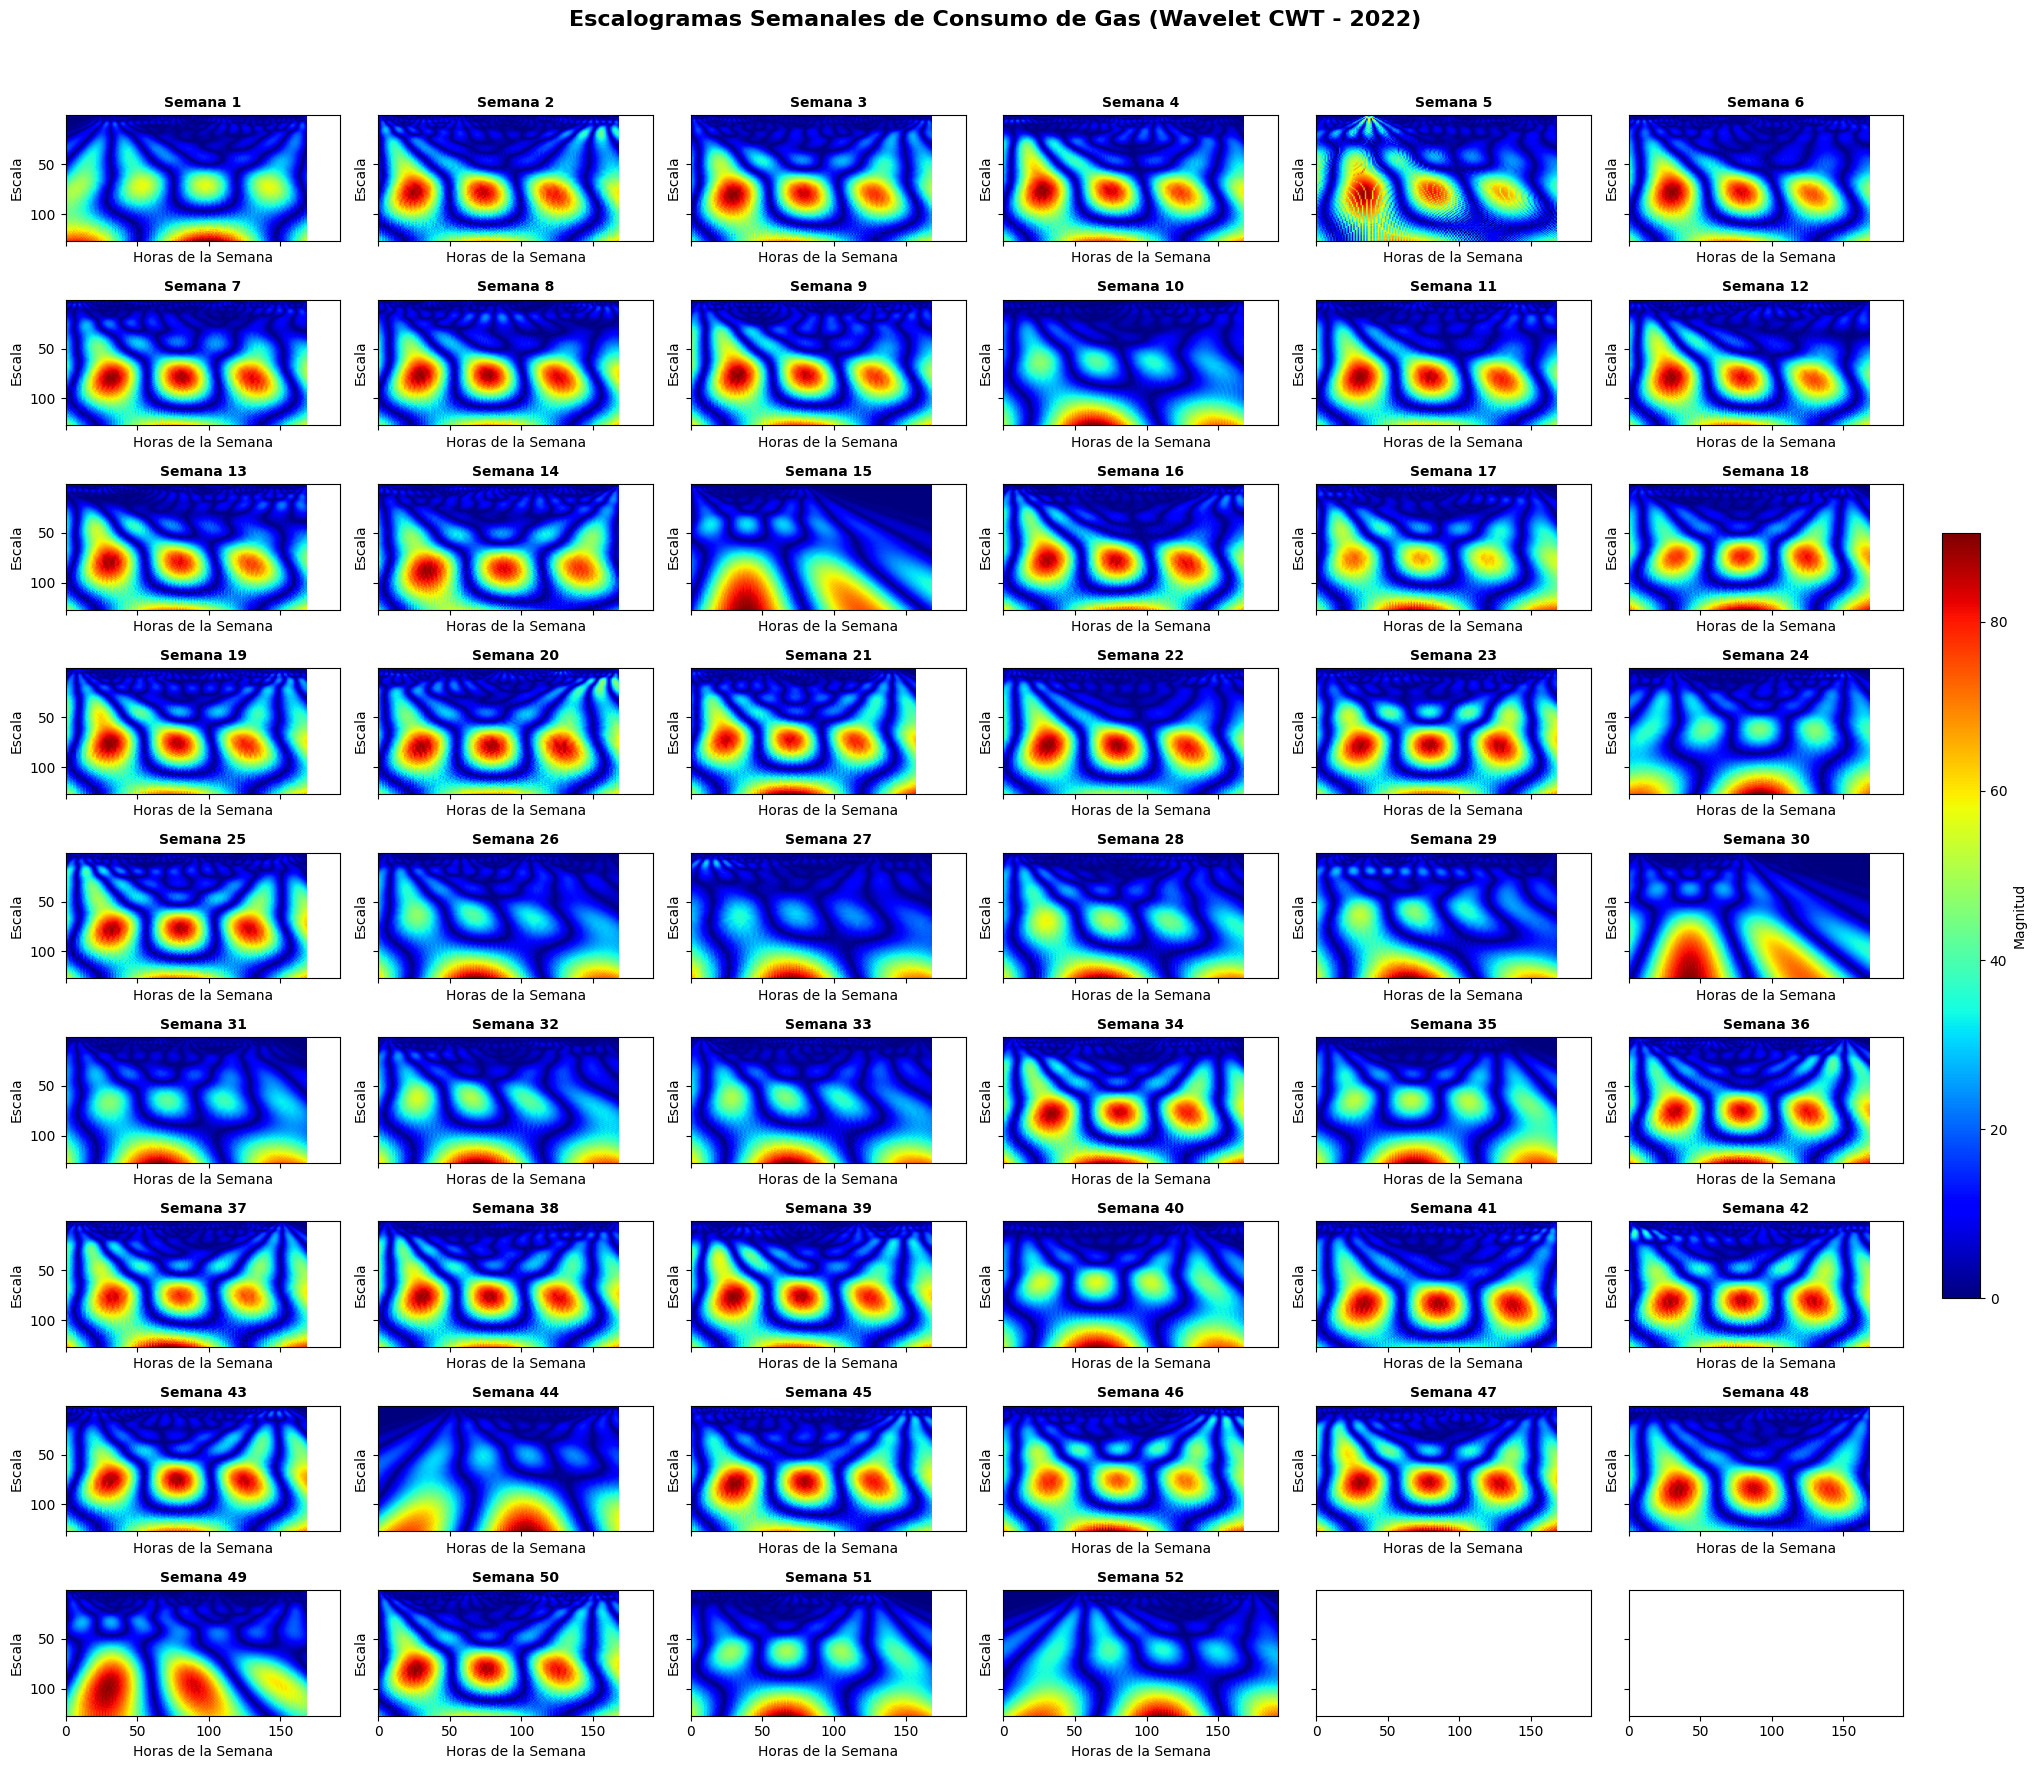

In [160]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math

# Cargar los datos desde Excel
e1 = pd.read_excel(r"C:/Users/diana/OneDrive - Universidad de los Andes/Documentos/9no Semestre/TesisGEB_AlejaYCami/Repositorio/ProyectoGradoGEB/datos/EICH101.xlsx")

# Convertir la columna EFFECTIVE_DATE a datetime y establecerla como índice
e1['EFFECTIVE_DATE'] = pd.to_datetime(e1['EFFECTIVE_DATE'])
e1.set_index('EFFECTIVE_DATE', inplace=True)

# Filtrar los datos para el año 2022
df_2022 = e1[e1.index.year == 2022].copy()

# Obtener la lista de semanas únicas en orden correcto
weeks = sorted(df_2022.index.to_series().dt.isocalendar().week.unique())

# Asegurar que la semana 52 se ordena correctamente
weeks = [w for w in weeks if w != 52] + [52] if 52 in weeks else weeks

num_weeks = len(weeks)

# Definir el número de columnas y calcular filas dinámicamente
num_cols = 6  # Número fijo de columnas para que sea legible
num_rows = math.ceil(num_weeks / num_cols)  # Número de filas según las semanas

# Crear la figura con subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 2), sharex=True, sharey=True)
fig.suptitle("Escalogramas Semanales de Consumo de Gas (Wavelet CWT - 2022)", fontsize=16, fontweight="bold")

# Escalas para el wavelet
scales = np.arange(1, 128)

# Iterar sobre cada semana y graficar el escalograma
for i, week in enumerate(weeks):
    df_week = df_2022[df_2022.index.to_series().dt.isocalendar().week == week]
    signal_week = df_week["ORIG_RAW_VOLUME"].values

    if len(signal_week) > 0:  # Evitar errores con semanas vacías
        coefficients, frequencies = pywt.cwt(signal_week, scales, "morl")

        # Determinar la posición en la cuadrícula
        row, col = divmod(i, num_cols)
        ax = axes[row, col] if num_rows > 1 else axes[col]

        # Graficar el escalograma
        img = ax.imshow(np.abs(coefficients), aspect="auto", cmap="jet",
                        extent=[0, len(signal_week), scales[-1], scales[0]])
        ax.set_title(f"Semana {week}", fontsize=10, fontweight="bold")
        ax.set_xlabel("Horas de la Semana")
        ax.set_ylabel("Escala")

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Agregar barra de color
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Magnitud")

# Mostrar la figura
plt.show()
